<a href="https://colab.research.google.com/github/nattaptiy/nlp100/blob/master/nlp100_unit7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Loading

In [1]:
!wget -c https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!wget -c http://download.tensorflow.org/data/questions-words.txt
!wget -c http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip

!gunzip wordsim353.zip.gz
!unzip wordsim353.zip

--2020-06-05 00:16:06--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.229.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.229.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.6MB/s    in 96s     

2020-06-05 00:17:43 (16.3 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]

--2020-06-05 00:17:45--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.188.128, 2404:6800:4008:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.188.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.tx

60. 単語ベクトルの読み込みと表示

In [2]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


61. 単語の類似度

In [3]:
model.similarity("United_States", "U.S.")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.73107743

62. 類似度の高い単語10件

In [0]:
model.most_similar("United_States")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

63. 加法構成性によるアナロジー

In [0]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

64. アナロジーデータでの実験

In [0]:
with open('questions-words.txt') as file:
    lines = file.read().splitlines()

data = []
category = None
for line in lines:
    if line.startswith(':'):
        category = line[2:]
    else:
        lst = [category] + line.split(' ')
        data.append(lst)

In [0]:
data[:5]

[['capital-common-countries', 'Athens', 'Greece', 'Baghdad', 'Iraq'],
 ['capital-common-countries', 'Athens', 'Greece', 'Bangkok', 'Thailand'],
 ['capital-common-countries', 'Athens', 'Greece', 'Beijing', 'China'],
 ['capital-common-countries', 'Athens', 'Greece', 'Berlin', 'Germany'],
 ['capital-common-countries', 'Athens', 'Greece', 'Bern', 'Switzerland']]

In [0]:
from tqdm import tqdm
for i, lst in enumerate(tqdm(data)):
    data[i].extend(model.most_similar(positive = lst[2:4], negative = lst[1:2], topn = 1)[0])

  0%|          | 0/19544 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
100%|██████████| 19544/19544 [2:20:43<00:00,  2.31it/s]


In [0]:
data[:5]

[['capital-common-countries',
  'Athens',
  'Greece',
  'Baghdad',
  'Iraq',
  'Iraqi',
  0.6351870894432068],
 ['capital-common-countries',
  'Athens',
  'Greece',
  'Bangkok',
  'Thailand',
  'Thailand',
  0.7137669324874878],
 ['capital-common-countries',
  'Athens',
  'Greece',
  'Beijing',
  'China',
  'China',
  0.7235777974128723],
 ['capital-common-countries',
  'Athens',
  'Greece',
  'Berlin',
  'Germany',
  'Germany',
  0.6734622120857239],
 ['capital-common-countries',
  'Athens',
  'Greece',
  'Bern',
  'Switzerland',
  'Switzerland',
  0.4919748306274414]]

65. アナロジータスクでの正解率

In [0]:
import numpy as np

semantic = [lst[4:6] for lst in data if not lst[0].startswith('gram')]
syntactic = [lst[4:6] for lst in data if lst[0].startswith('gram')]
semantic_acc = np.mean([x == y for x, y in semantic])
print('semantic_acc :', semantic_acc)
syntactic_acc = np.mean([x == y for x, y in syntactic])
print('syntactic_acc :', syntactic_acc)

semantic_acc : 0.7308602999210734
syntactic_acc : 0.7400468384074942


66. WordSimilarity-353での評価

In [0]:
import pandas as pd

data_testsim = pd.read_csv('combined.csv')  
print(data_testsim.head())

     Word 1    Word 2  Human (mean)
0      love       sex          6.77
1     tiger       cat          7.35
2     tiger     tiger         10.00
3      book     paper          7.46
4  computer  keyboard          7.62


In [0]:
data_testsim['Similarity'] = [model.similarity(x, y) for x, y in zip(data_testsim['Word 1'], data_testsim['Word 2'])]
print(data_testsim.head())

     Word 1    Word 2  Human (mean)  Similarity
0      love       sex          6.77    0.263938
1     tiger       cat          7.35    0.517296
2     tiger     tiger         10.00    1.000000
3      book     paper          7.46    0.363463
4  computer  keyboard          7.62    0.396392


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from scipy.stats import spearmanr
human_rank = data_testsim['Human (mean)'].rank().to_numpy()
w2v_rank = data_testsim['Similarity'].rank().to_numpy()

print(spearmanr(human_rank, w2v_rank))

SpearmanrResult(correlation=0.7000166486272194, pvalue=2.86866666051422e-53)


67. k-meansクラスタリング

In [0]:
countries = {
    country
    for lst in data
    for country in [lst[2], lst[4]]
    if lst[0] in {'capital-common-countries', 'capital-world'}
} | {
    country
    for lst in data
    for country in [lst[1], lst[3]]
    if lst[0] in {'currency', 'gram6-nationality-adjective'}
}
countries = list(countries)
country_vectors = [model[country] for country in countries]

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(country_vectors)

for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('Class', i)
    print(', '.join([countries[k] for k in cluster]))

Class 0
Syria, Oman, Israel, Afghanistan, Malaysia, Bahrain, Indonesia, Jordan, Morocco, Qatar, Thailand, Pakistan, Lebanon, Vietnam, Iraq, Algeria, Tunisia, India, Egypt, Iran, Libya
Class 1
Hungary, Greece, Turkey, Moldova, Lithuania, Kyrgyzstan, Poland, Russia, Macedonia, Uzbekistan, Ukraine, Tajikistan, Kazakhstan, Croatia, Latvia, Bulgaria, Belarus, Estonia, Slovenia, Montenegro, Azerbaijan, Romania, Georgia, Armenia, Slovakia, Serbia, Albania, Turkmenistan, Cyprus
Class 2
Samoa, Uruguay, Suriname, Argentina, Brazil, Venezuela, Honduras, Bahamas, Philippines, Cuba, Peru, Nicaragua, Ecuador, Jamaica, Colombia, Mexico, Guyana, Chile, Belize, Dominica, Fiji
Class 3
Niger, Mauritania, Malawi, Sudan, Liberia, Senegal, Eritrea, Burundi, Madagascar, Zimbabwe, Zambia, Cambodia, Guinea, Bhutan, Namibia, Gabon, Angola, Nepal, Bangladesh, Uganda, Mali, Nigeria, Somalia, Laos, Gambia, Mozambique, Kenya, Rwanda, Ghana, Botswana
Class 4
USA, Iceland, Tuvalu, Taiwan, Greenland, Spain, Finland, C

68. Ward法によるクラスタリング

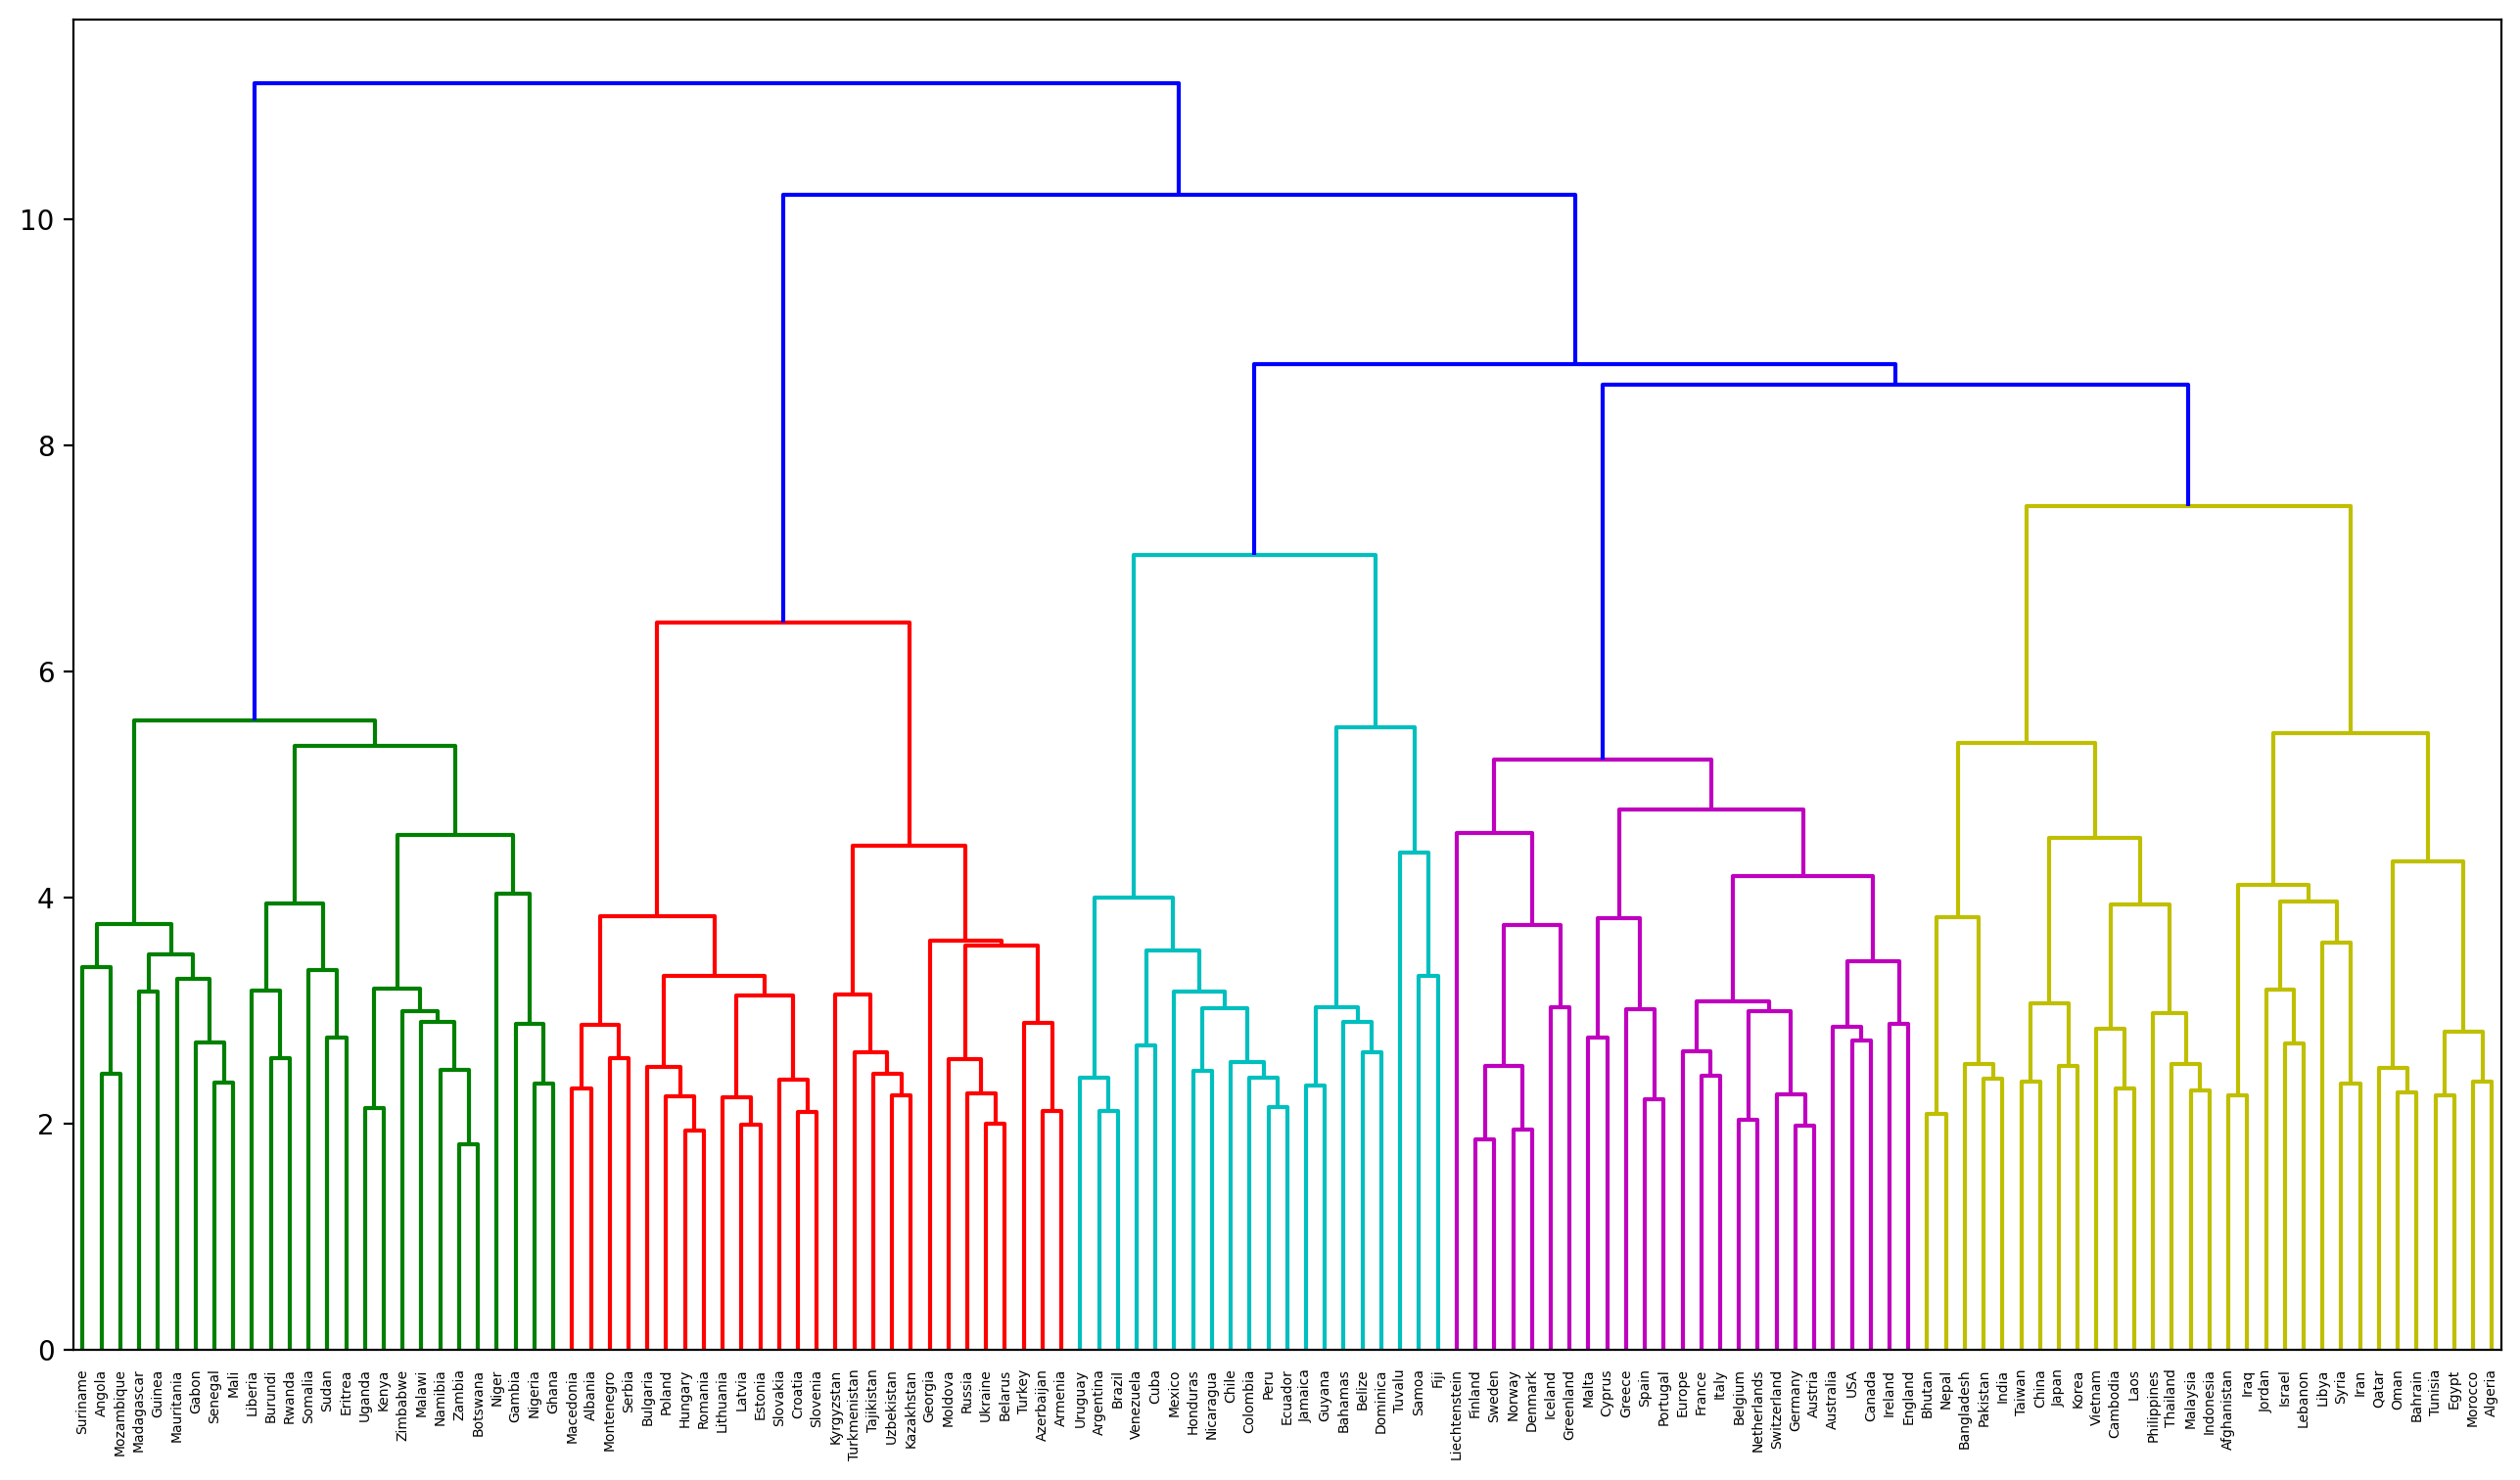

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9), dpi=200)
Z = linkage(country_vectors, method='ward')
dendrogram(Z, labels = countries)
plt.show()

69. t-SNEによる可視化

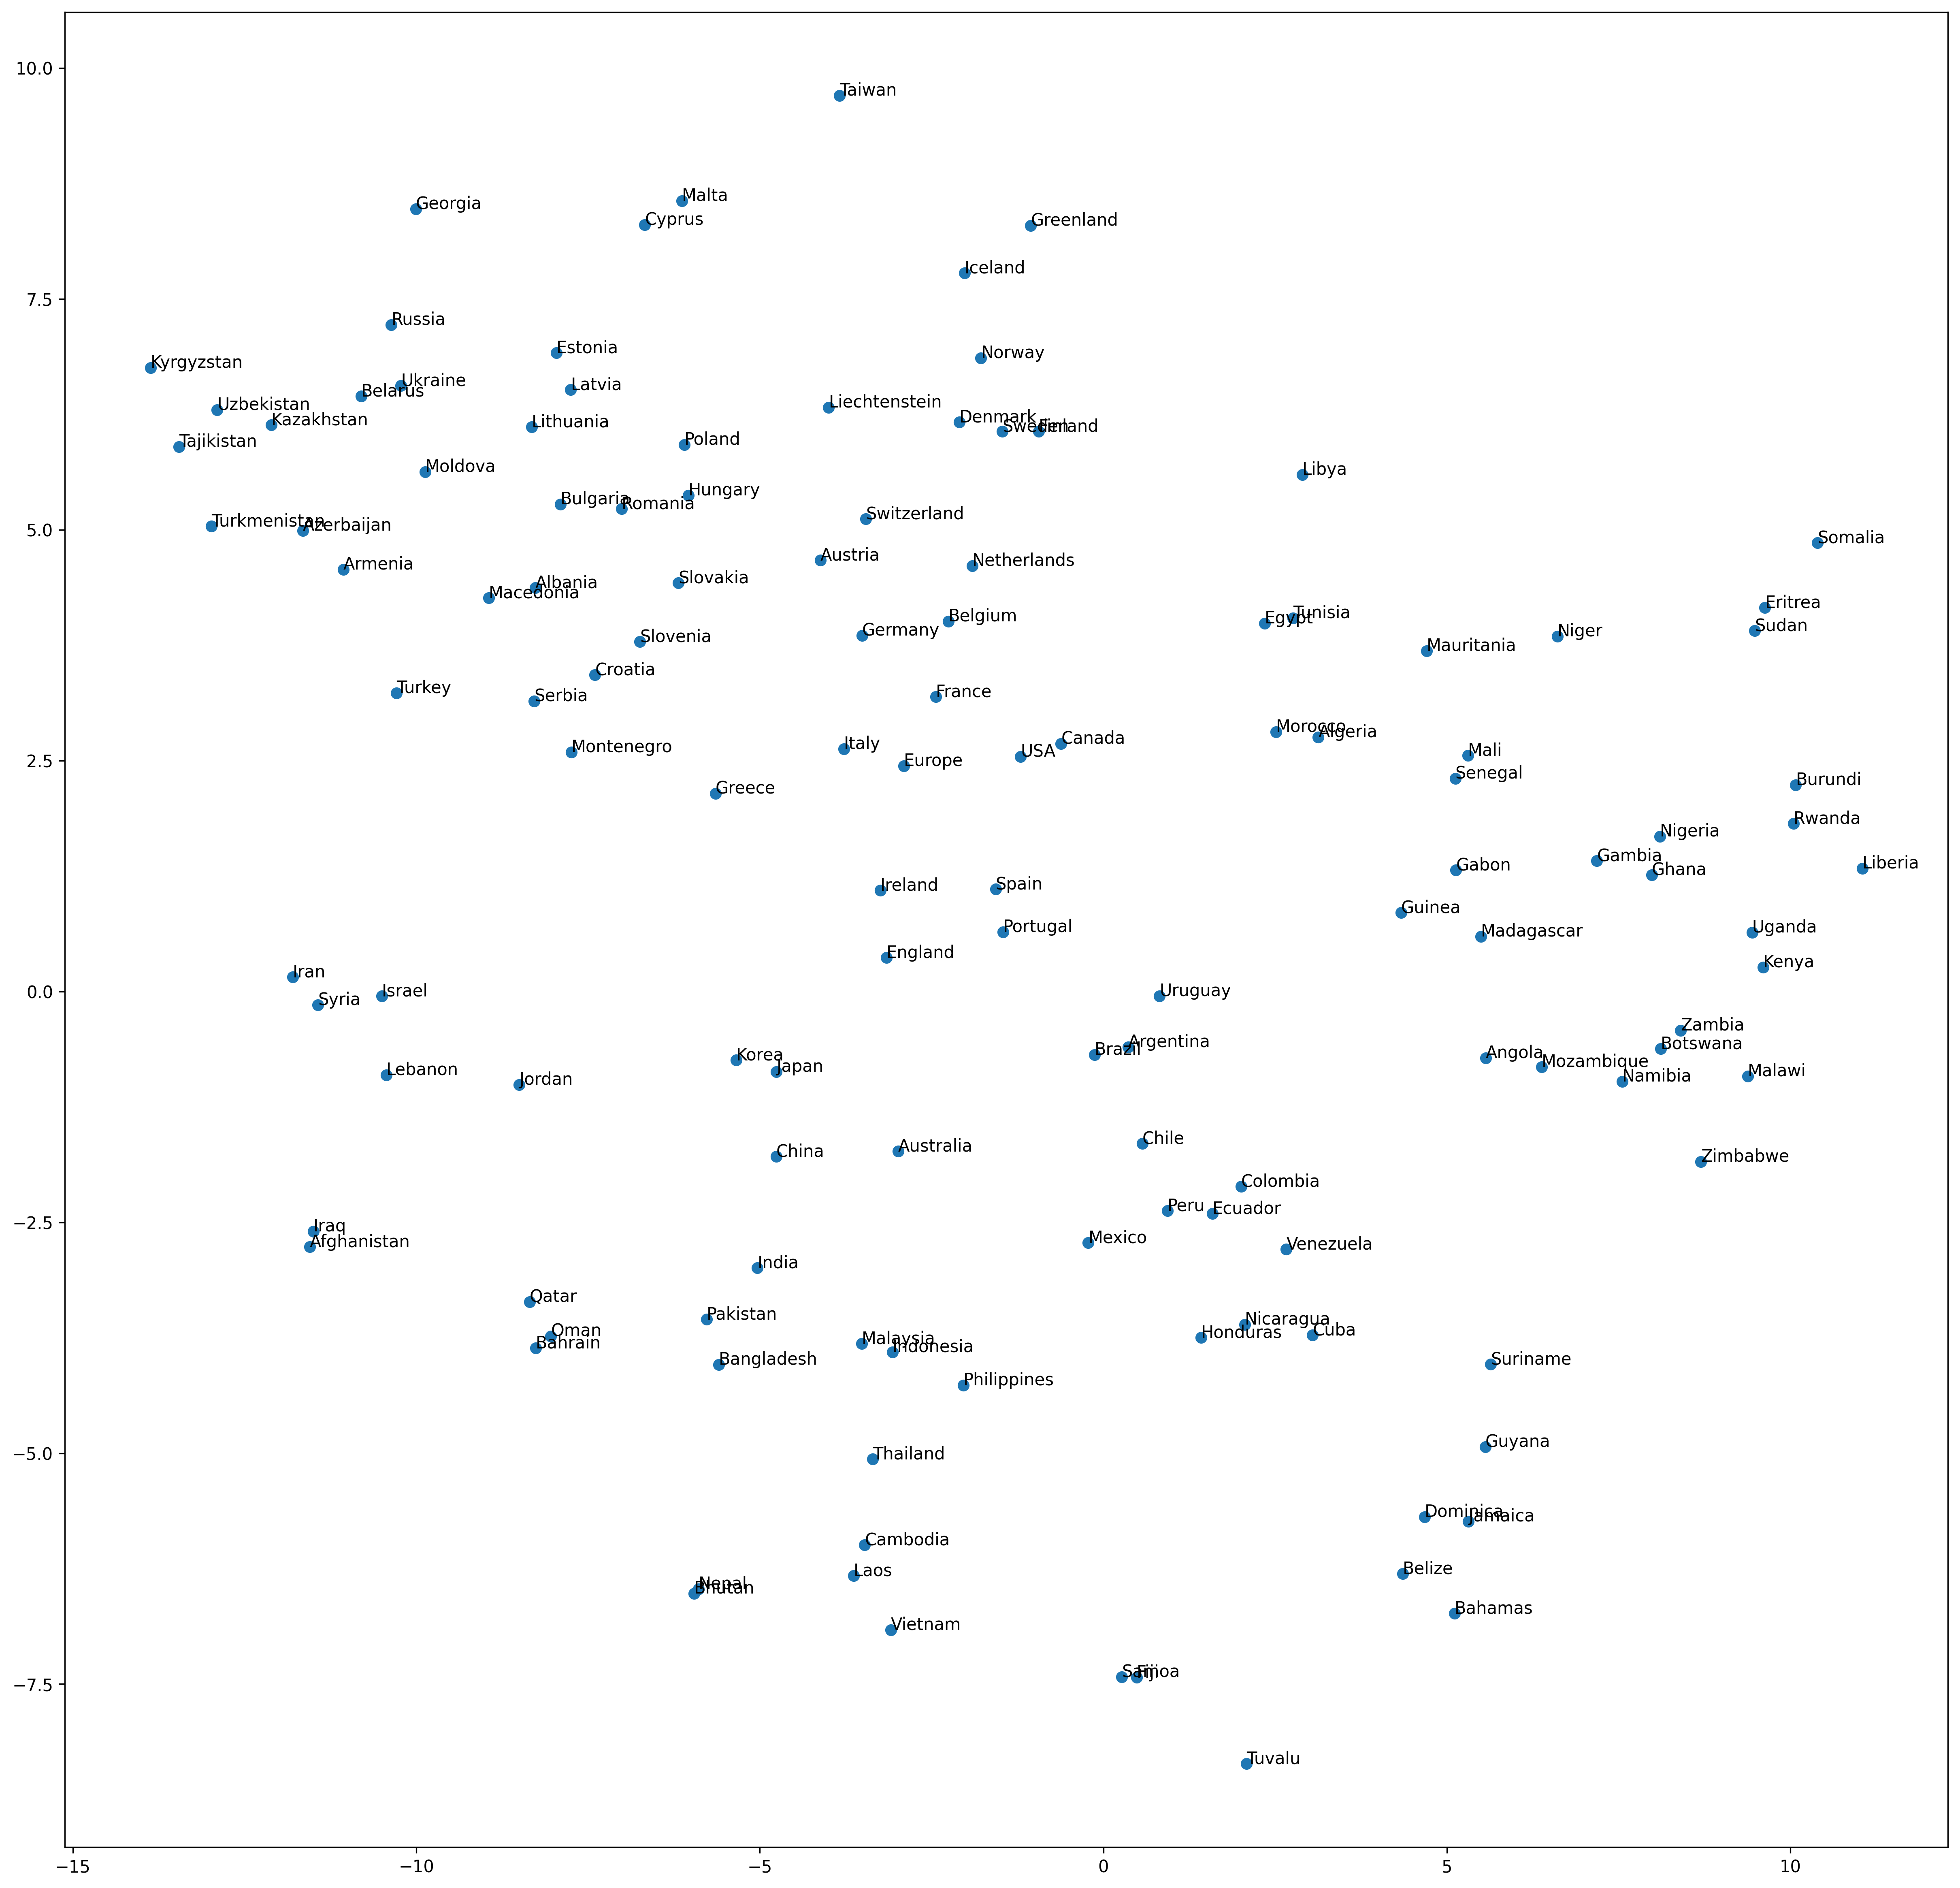

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne.fit(country_vectors)

plt.figure(figsize=(20, 20), dpi=300)
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])
for (x, y), name in zip(tsne.embedding_, countries):
    plt.annotate(name, (x, y))